In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
def load_data():
    train = pd.read_csv('./data/train.csv')
    test = pd.read_csv('./data/test.csv')
    return [train, test]

In [3]:
def show_data():
    train , test = load_data()
    print('--------------------train--------------------')
    print(train.info())
    print('--------------------test--------------------')
    print(test.info())
show_data()

--------------------train--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None
--------------------test--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-nul

In [4]:
load_data()[1].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
def translate_datetime(X):
    X_ = X.copy()
    X_date = pd.DatetimeIndex(X['datetime'])
    X_['year'] = X_date.year
    X_['month'] = X_date.month
    X_['hour'] = X_date.hour
    X_['dayofweek'] = X_date.dayofweek
    return X_

In [6]:
train = translate_datetime(load_data()[0])

In [7]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

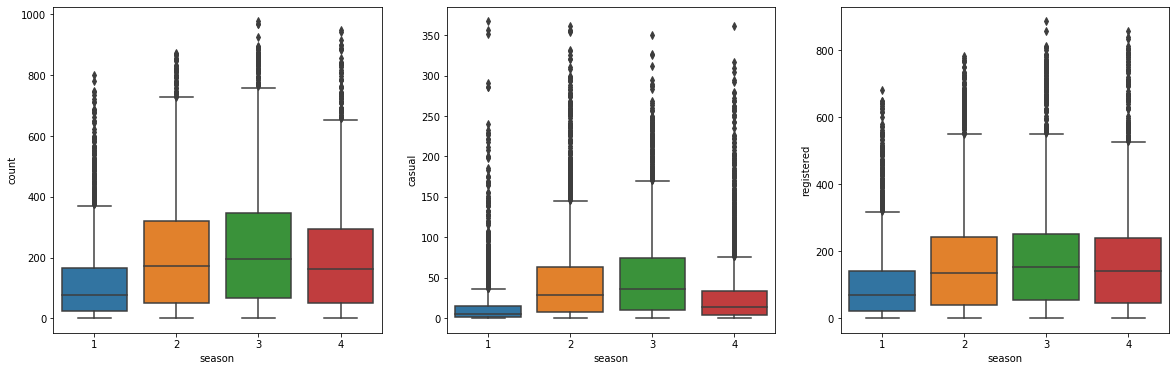

In [8]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,3)
sns.boxplot(x = 'season', y = 'count', data=train ,ax=axes[0])
sns.boxplot(x = 'season', y = 'casual', data=train ,ax=axes[1])
sns.boxplot(x = 'season', y = 'registered', data=train ,ax=axes[2])

In [9]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [10]:
np.any(train['casual'] + train ['registered'] != train['count'])

False

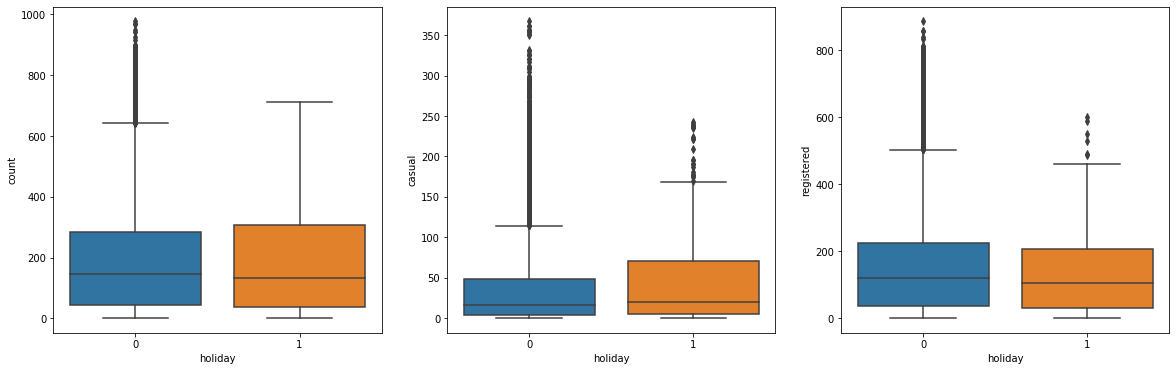

In [11]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,3)
sns.boxplot(x = 'holiday' ,y = 'count' ,data = train,ax=axes[0])
sns.boxplot(x = 'holiday' ,y = 'casual' ,data = train,ax=axes[1]) # holiday  more
sns.boxplot(x = 'holiday' ,y = 'registered' ,data = train,ax=axes[2]) # holiday even

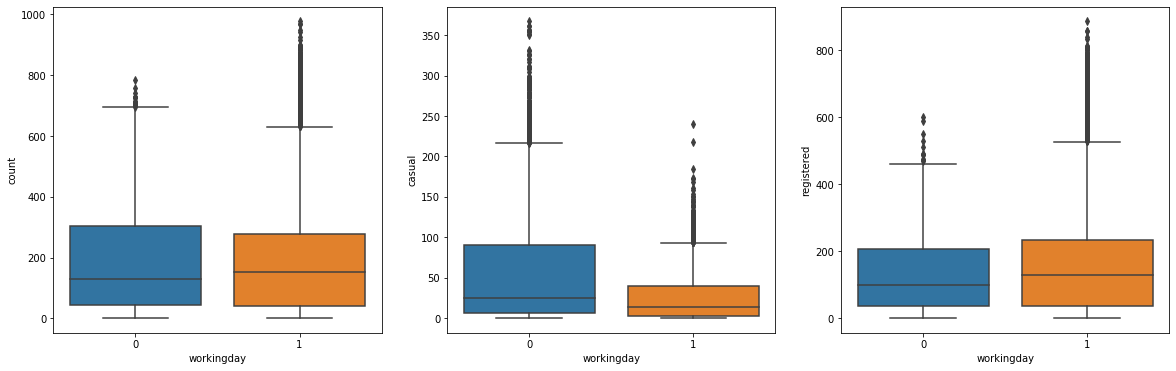

In [12]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,3)
sns.boxplot(x = 'workingday' ,y = 'count' ,data = train,ax=axes[0]) #
sns.boxplot(x = 'workingday' ,y = 'casual' ,data = train,ax=axes[1]) # working day less
sns.boxplot(x = 'workingday' ,y = 'registered' ,data = train,ax=axes[2]) # workingday even

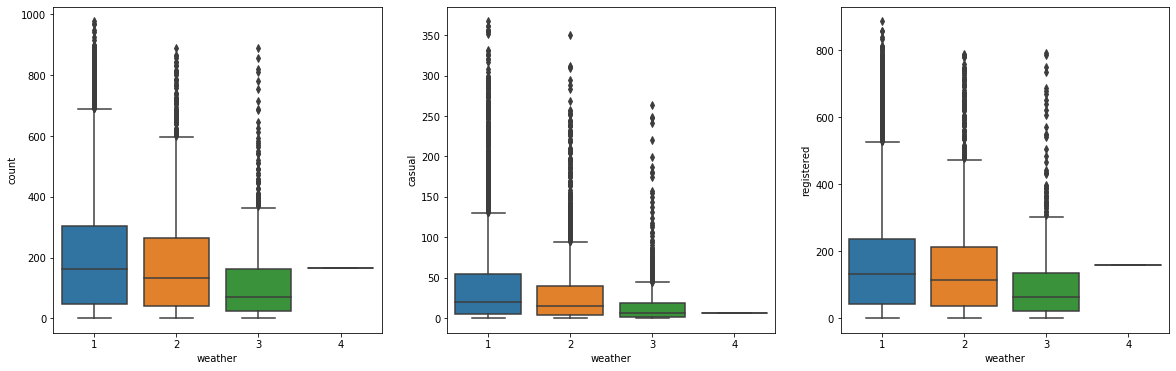

In [14]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,3)
sns.boxplot(x = 'weather' ,y = 'count' ,data = train,ax=axes[0])
sns.boxplot(x = 'weather' ,y = 'casual' ,data = train,ax=axes[1])
sns.boxplot(x = 'weather' ,y = 'registered' ,data = train,ax=axes[2])

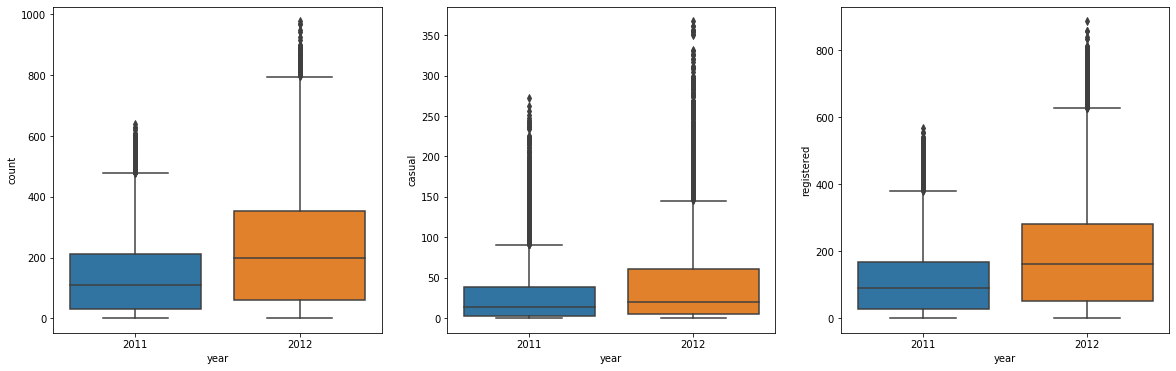

In [15]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(1,3)
sns.boxplot(x = 'year' ,y = 'count' ,data = train,ax=axes[0])
sns.boxplot(x = 'year' ,y = 'casual' ,data = train,ax=axes[1])
sns.boxplot(x = 'year' ,y = 'registered' ,data = train,ax=axes[2])

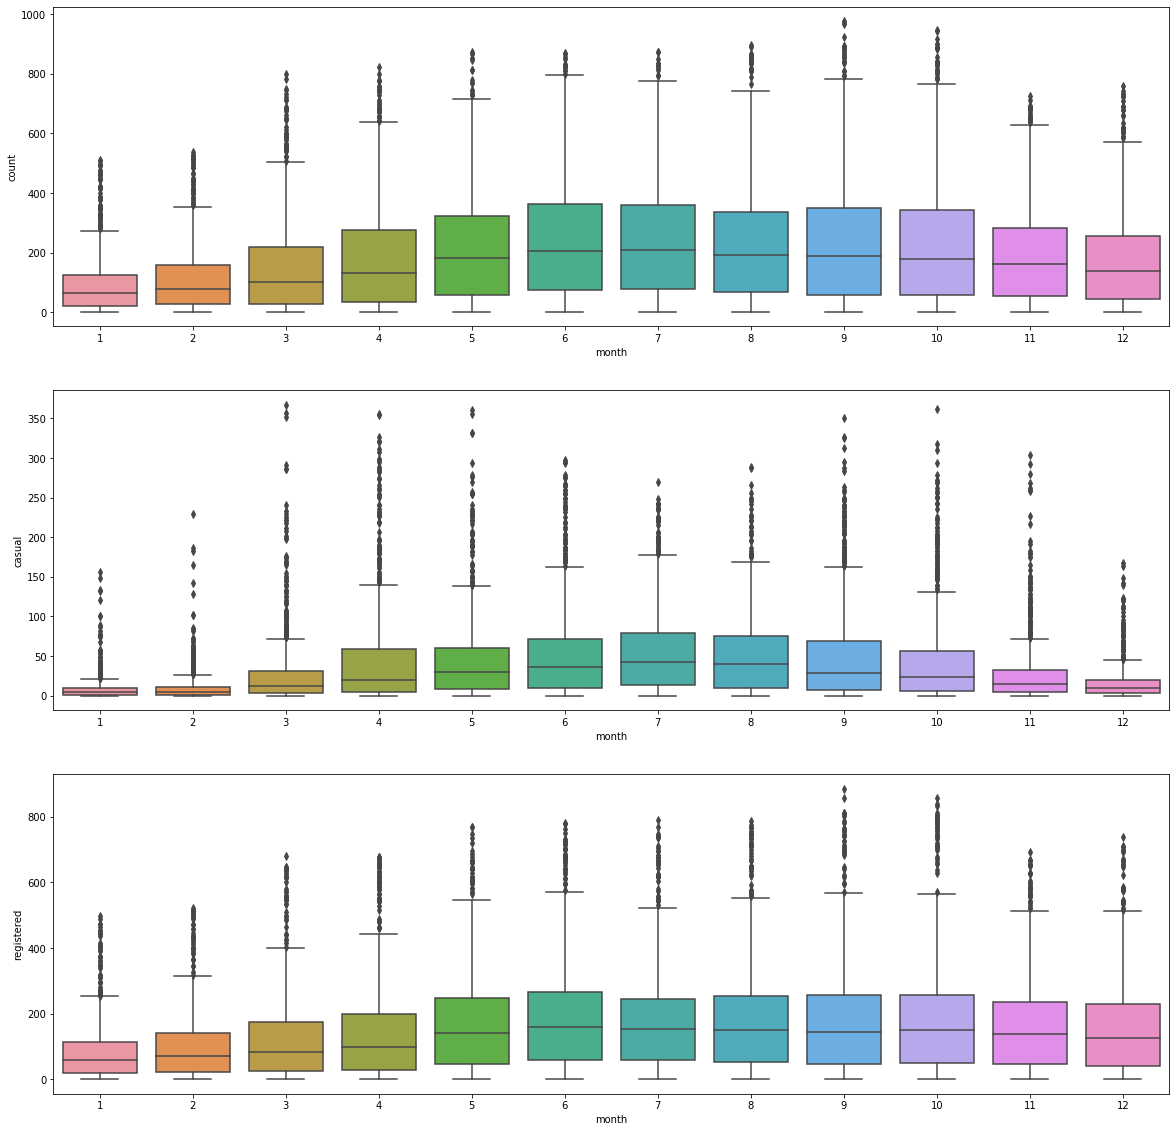

In [16]:
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(3,1)
sns.boxplot(x = 'month' ,y = 'count' ,data = train,ax=axes[0])
sns.boxplot(x = 'month' ,y = 'casual' ,data = train,ax=axes[1])
sns.boxplot(x = 'month' ,y = 'registered' ,data = train,ax=axes[2])

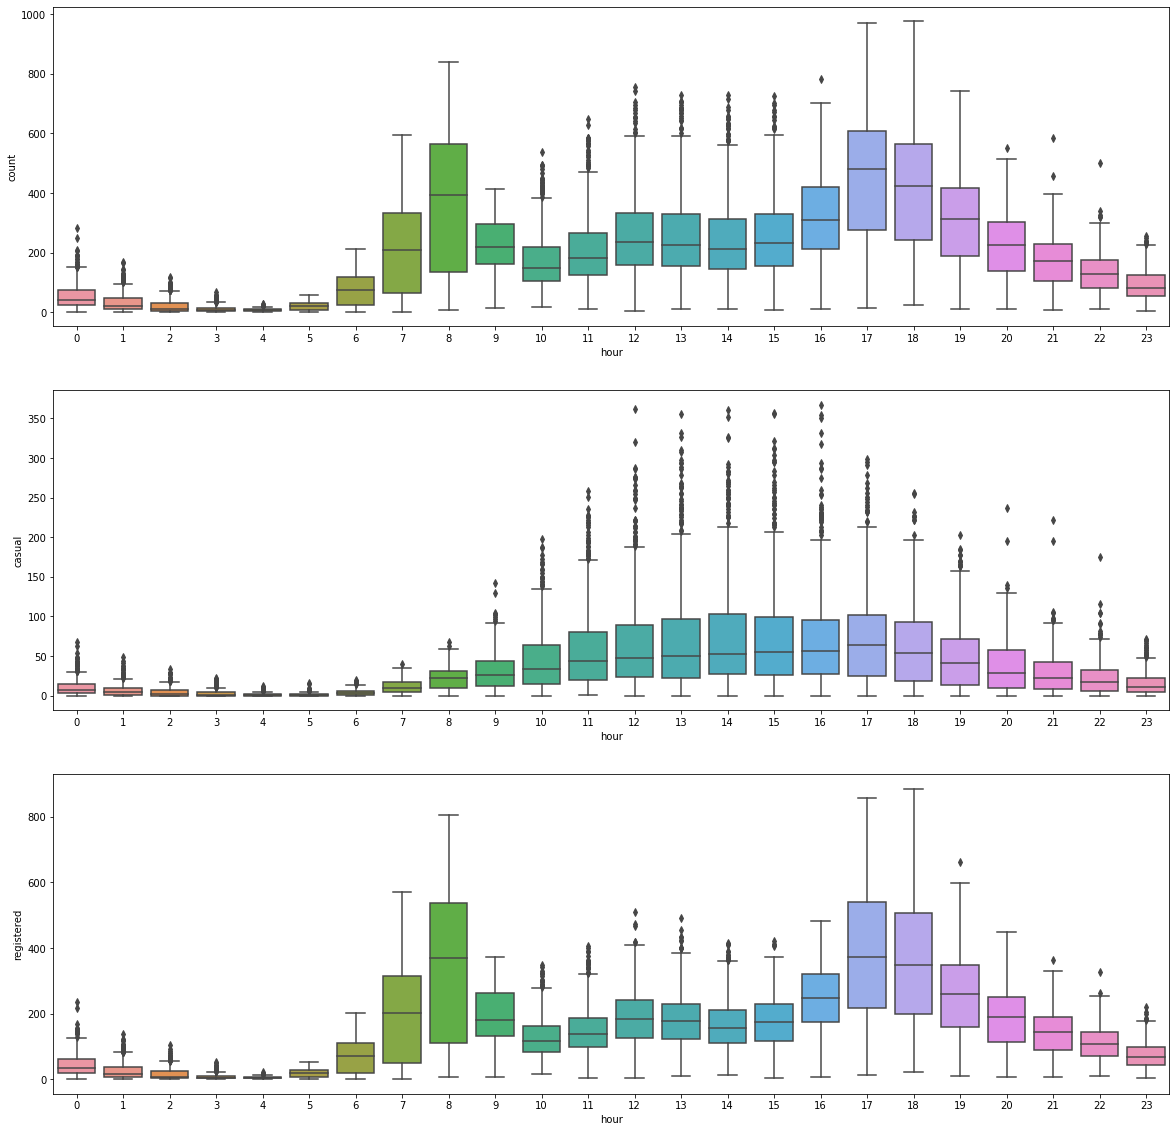

In [17]:
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(3,1)
sns.boxplot(x = 'hour' ,y = 'count' ,data = train,ax=axes[0])
sns.boxplot(x = 'hour' ,y = 'casual' ,data = train,ax=axes[1])
sns.boxplot(x = 'hour' ,y = 'registered' ,data = train,ax=axes[2])

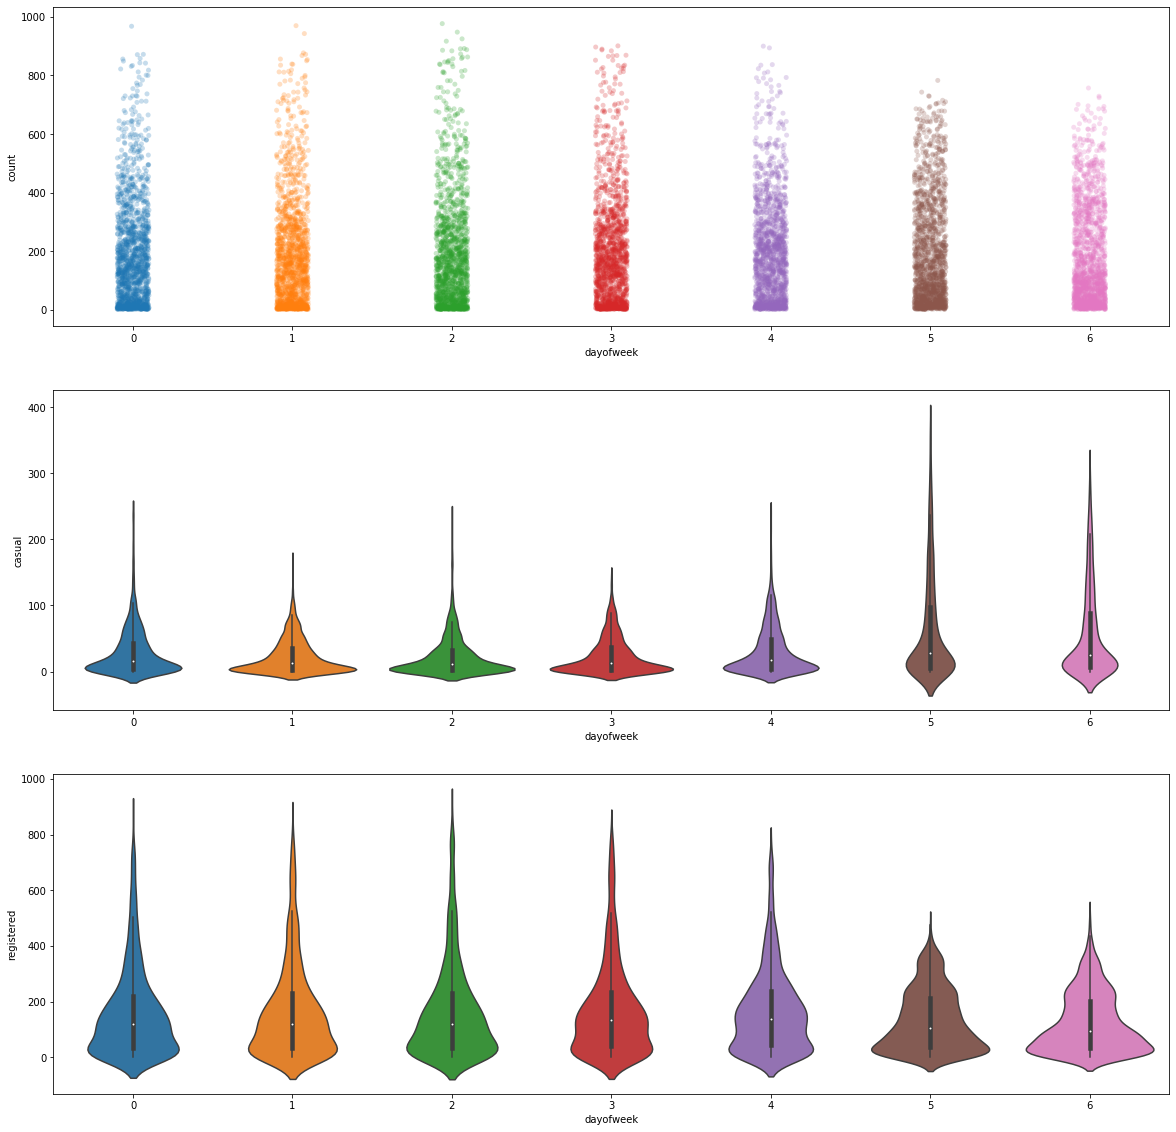

In [24]:
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(3,1)

sns.stripplot(x = 'dayofweek' ,y = 'count' ,data = train,ax=axes[0] ,dodge=True ,jitter=True ,alpha=.25)
sns.violinplot(x = 'dayofweek' ,y = 'casual' ,data = train,ax=axes[1])
sns.violinplot(x = 'dayofweek' ,y = 'registered' ,data = train,ax=axes[2])

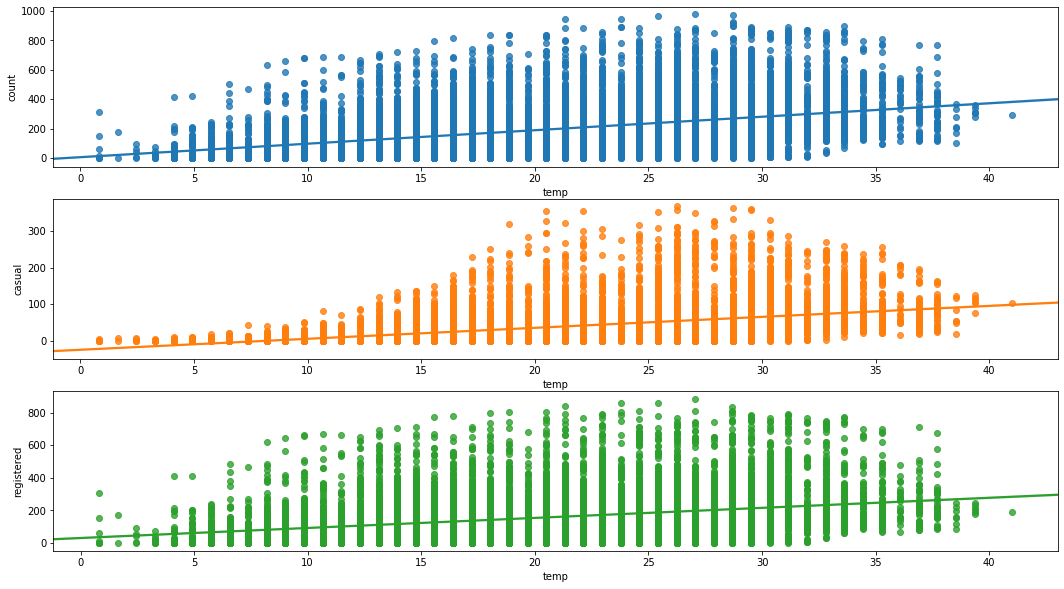

In [31]:
fig = plt.figure(figsize=(18,10))
axes = fig.subplots(3,1)

sns.regplot(x = 'temp' ,y = 'count' ,data = train,ax=axes[0])
sns.regplot(x = 'temp' ,y = 'casual' ,data = train,ax=axes[1])
sns.regplot(x = 'temp' ,y = 'registered' ,data = train,ax=axes[2])

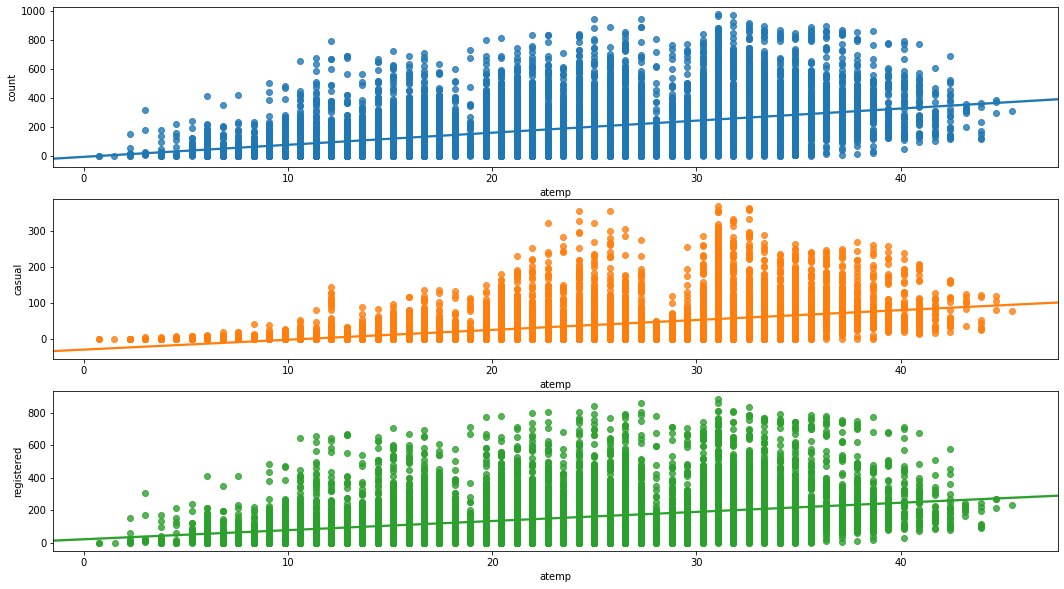

In [32]:
fig = plt.figure(figsize=(18,10))
axes = fig.subplots(3,1)

sns.regplot(x = 'atemp' ,y = 'count' ,data = train,ax=axes[0])
sns.regplot(x = 'atemp' ,y = 'casual' ,data = train,ax=axes[1])
sns.regplot(x = 'atemp' ,y = 'registered' ,data = train,ax=axes[2])

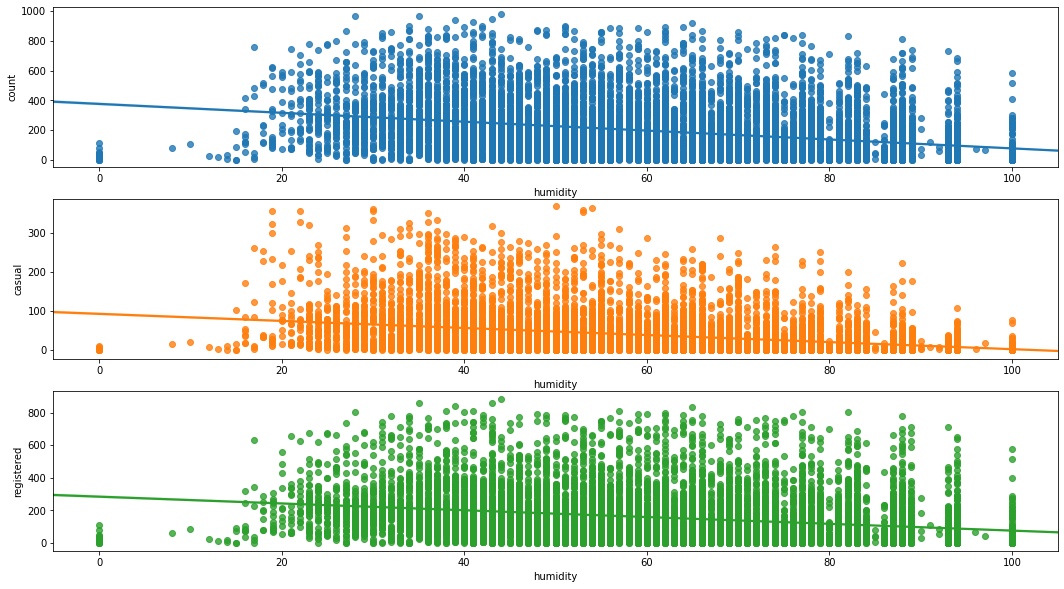

In [33]:
fig = plt.figure(figsize=(18,10))
axes = fig.subplots(3,1)

sns.regplot(x = 'humidity' ,y = 'count' ,data = train,ax=axes[0])
sns.regplot(x = 'humidity' ,y = 'casual' ,data = train,ax=axes[1])
sns.regplot(x = 'humidity' ,y = 'registered' ,data = train,ax=axes[2])

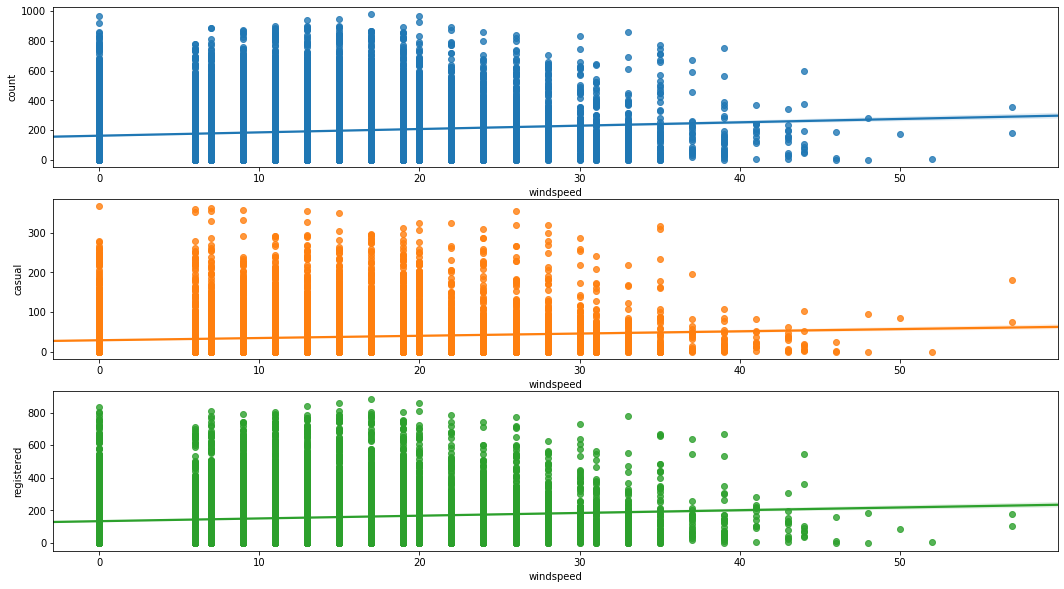

In [39]:
fig = plt.figure(figsize=(18,10))
axes = fig.subplots(3,1)

sns.regplot(x = 'windspeed' ,y = 'count' ,data = train,ax=axes[0])
sns.regplot(x = 'windspeed' ,y = 'casual' ,data = train,ax=axes[1])
sns.regplot(x = 'windspeed' ,y = 'registered' ,data = train,ax=axes[2])